<a href="https://colab.research.google.com/github/Calebcarp/CS290/blob/main/descentpenguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
penguins = pd.read_csv("https://github.com/mbrudd/csci290/raw/refs/heads/main/data/penguins.csv")

In [4]:
df = penguins.dropna()
X = df[['bill_length_mm']].values
y = df['bill_depth_mm'].values

In [5]:
m = len(X)
X_b = np.c_[np.ones((m, 1)), X]

<ipython-input-6-d700a6c7cbb7>:14: RuntimeWarning: overflow encountered in matmul
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
<ipython-input-6-d700a6c7cbb7>:15: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients


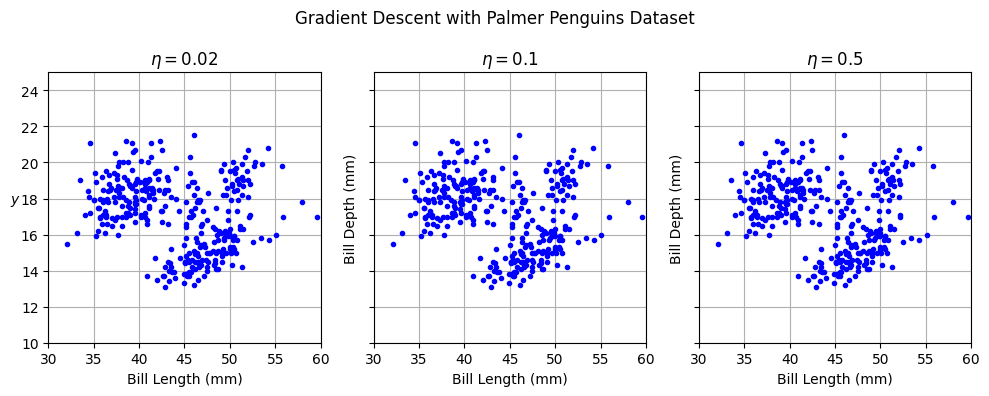

In [6]:
def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []

    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X, y_predict, linestyle="solid", color=color)

        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)

    plt.xlabel("Bill Length (mm)")
    plt.ylabel("Bill Depth (mm)")
    plt.axis([30, 60, 10, 25])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")

    return theta_path
np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))

plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)

plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])

plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)

plt.suptitle("Gradient Descent with Palmer Penguins Dataset")
plt.tight_layout()
plt.show()